In [ ]:
## Mount Google Drive Data (If using Google Colaboratory)
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print("Mounting Failed.")

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


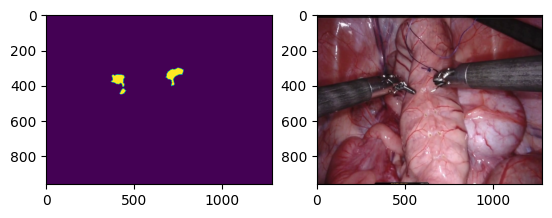

In [ ]:
ROI_img_path="/content/gdrive/MyDrive/training_data/clip_000000/0/ROI_image.png"
Original_img_path="/content/gdrive/MyDrive/training_data/clip_000000/0/original_image.png"
ROI_img = cv2.imread(ROI_img_path,cv2.IMREAD_GRAYSCALE)
Original_img = cv2.imread(Original_img_path)
Original_img = cv2.cvtColor(Original_img, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(ROI_img)
plt.subplot(1,2,2)
plt.imshow(Original_img)



In [ ]:
print(ROI_img.shape)
print(Original_img.shape)

(960, 1280)
(960, 1280, 3)


In [ ]:
ret, thresh = cv2.threshold(ROI_img, 0, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

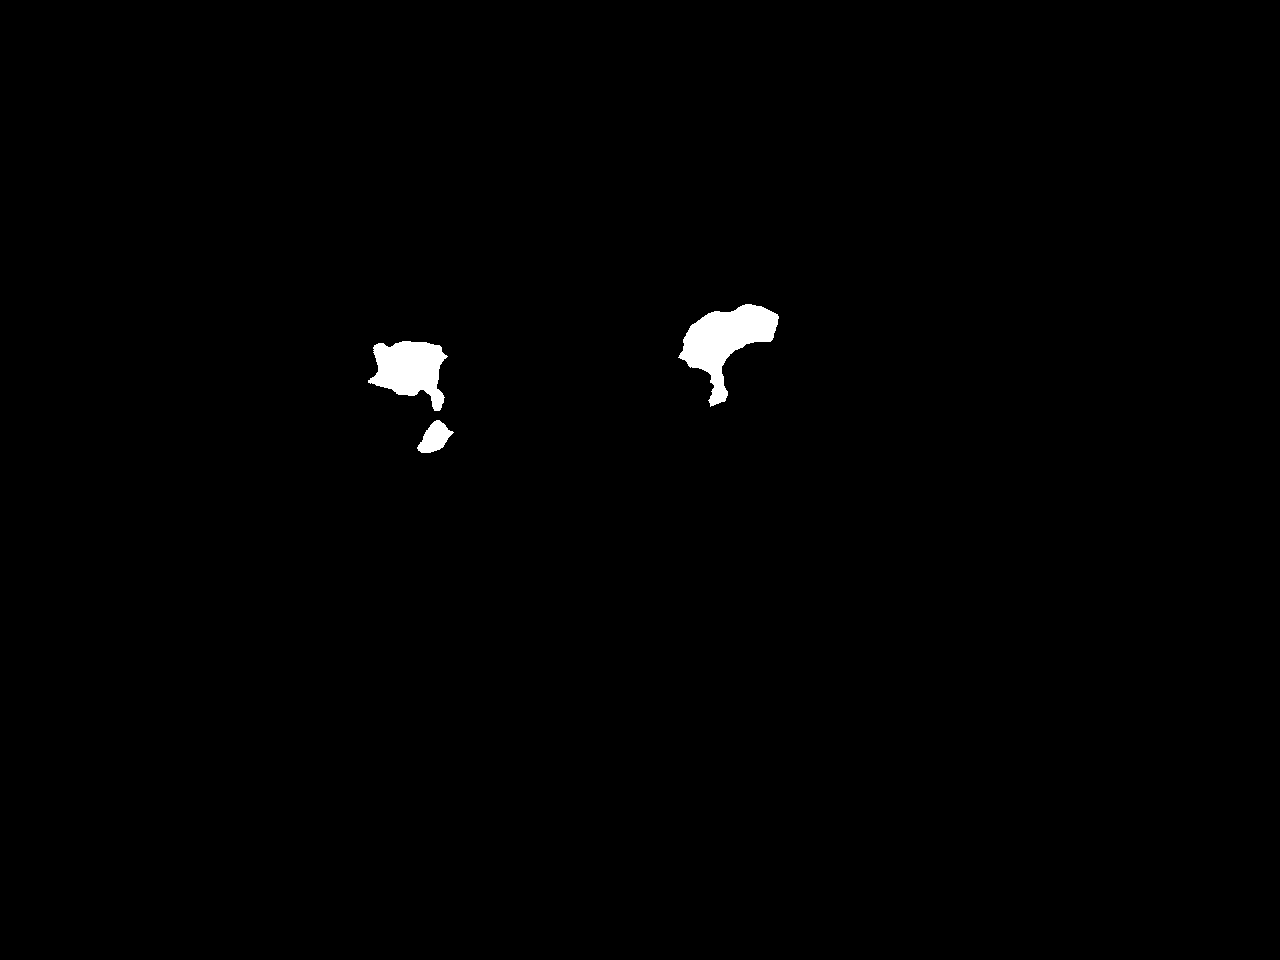

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(thresh)

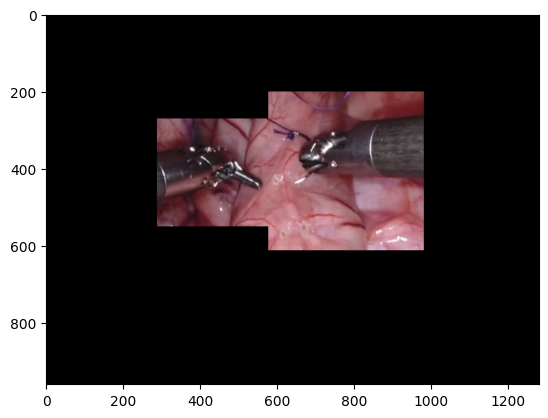

In [ ]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img = ROI_img.copy()
# 遍历轮廓并绘制 bounding box
new_img = np.zeros_like(Original_img)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)


    new_x = max(0, x - int(w))
    new_y = max(0, y - int(h))

    w *= 4
    h *= 4

    # 将宽度和高度分别扩大为原先的两倍


    new_img[new_y:new_y+h, new_x:new_x+w,:] = Original_img[new_y:new_y+h, new_x:new_x+w,:]

plt.imshow(new_img)


In [ ]:
import os
def get_subdirectories(folder_path):
    subdirectories = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    return subdirectories

folder_path = "/content/gdrive/MyDrive/video_to_image"

name_list = get_subdirectories(folder_path)
name_list.sort()
print(name_list)

['clip_000000', 'clip_000001', 'clip_000002', 'clip_000003', 'clip_000004', 'clip_000005', 'clip_000006', 'clip_000007', 'clip_000008', 'clip_000009', 'clip_000010', 'clip_000011', 'clip_000012', 'clip_000013', 'clip_000014', 'clip_000015', 'clip_000016', 'clip_000017', 'clip_000018', 'clip_000019', 'clip_000020', 'clip_000021', 'clip_000022', 'clip_000023', 'clip_000024', 'clip_000025', 'clip_000026', 'clip_000027', 'clip_000028', 'clip_000029', 'clip_000030', 'clip_000031', 'clip_000032', 'clip_000033', 'clip_000034', 'clip_000035', 'clip_000036', 'clip_000037', 'clip_000038', 'clip_000039', 'clip_000040', 'clip_000041', 'clip_000042', 'clip_000043', 'clip_000044', 'clip_000045', 'clip_000046', 'clip_000047', 'clip_000048', 'clip_000049', 'clip_000050', 'clip_000051', 'clip_000052', 'clip_000053', 'clip_000054', 'clip_000055', 'clip_000056', 'clip_000057', 'clip_000058', 'clip_000059', 'clip_000060', 'clip_000061', 'clip_000062', 'clip_000063', 'clip_000064', 'clip_000065', 'clip_000

In [ ]:
from pathlib import Path
original_file_names = []
for name in name_list:
    train_path= Path("/content/gdrive/MyDrive/training_data")
    original_file_names+=list ((train_path / name).glob('*'))
print(original_file_names)

[PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/0'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/1'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/2'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/3'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/4'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/5'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/6'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000000/7'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/0'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/1'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/2'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/3'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/4'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/5'), PosixPath('/content/gdrive/MyDrive/training_data/clip_000001/6'), PosixPath

In [ ]:
for file in original_file_names:
  ROI_img_path=str(file)+"/ROI_image.png"
  Original_img_path=str(file)+"/original_image.png"
  try:
    ROI_img = cv2.imread(ROI_img_path,cv2.IMREAD_GRAYSCALE)
    Original_img = cv2.imread(Original_img_path)
  except:
    print(file)
    continue

  ret, thresh = cv2.threshold(ROI_img, 0, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  img = ROI_img.copy()

  new_img_2 = np.zeros_like(Original_img)
  new_img_3 = np.zeros_like(Original_img)
  new_img = np.zeros_like(Original_img)
  for contour in contours:
      x, y, w, h = cv2.boundingRect(contour)

      new_img[y:y+h, x:x+w,:] = Original_img[y:y+h, x:x+w,:]

      new_x = max(0, x - int(w))
      new_y = max(0, y - int(h))

      w3 = 3*w
      h3 = 3*h

      w3 = min(w3, Original_img.shape[1] - new_x)
      h3 = min(h3, Original_img.shape[0] - new_y)

      new_img_3[new_y:new_y+h3, new_x:new_x+w3,:] = Original_img[new_y:new_y+h3, new_x:new_x+w3,:]

      w2 = 2*w
      h2 = 2*h

      new_x = max(0, x - int(w/2))
      new_y = max(0, y - int(h/2))

      w2 = min(w2, Original_img.shape[1] - new_x)
      h2 = min(h2, Original_img.shape[0] - new_y)

      new_img_2[new_y:new_y+h2, new_x:new_x+w2,:] = Original_img[new_y:new_y+h2, new_x:new_x+w2,:]

  cv2.imwrite(str(file)+"/masked_.png",new_img)
  cv2.imwrite(str(file)+"/masked_3_.png",new_img_3)
  cv2.imwrite(str(file)+"/masked_2_.png",new_img_2)
